# Comprehensive Exploratory Data Analysis
## PES University Placement Data (2022-2026)

**Project:** Temporal and Statistical Data Driven Insights into Talent Acquisition

**Objective:** Perform comprehensive EDA to understand placement patterns, compensation trends, and identify key insights for students.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import json

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

# Create output directory
Path('analysis_outputs').mkdir(exist_ok=True)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Data Loading and Initial Inspection

In [8]:
# Load the consolidated dataset
df = pd.read_csv('processed_data/consolidated_placement_data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nTotal Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDate Range: {df['batch_year'].min()} - {df['batch_year'].max()}")
print(f"Unique Companies: {df['company_name'].nunique():,}")
print(f"Unique Colleges: {df['college'].nunique()}")

df.head()

Dataset Shape: (1641, 32)

Total Records: 1,641
Total Features: 32

Date Range: 2022 - 2026
Unique Companies: 1,073
Unique Colleges: 1


,batch_year,college,source_file,company_name,job_role,placement_tier,internship_stipend,base_salary,total_ctc,num_offers_fte,...,num_offers_total,allows_ece,allows_mca,allows_mtech,has_internship,has_stocks,has_joining_bonus,salary_category,role_type,academic_year
0,2022,PES,Companies_list - Tier-3.csv,Quest Global,Trainee Engineer,Tier-3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,SDE-ML/AI,2018-2022
1,2022,PES,Companies_list - Tier-3.csv,Tcs (Ninja Hiring),NaN,Tier-3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,Other,2018-2022
2,2022,PES,Companies_list - Tier-3.csv,The Math Company,NaN,Tier-3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,Other,2018-2022
3,2022,PES,Companies_list - Tier-3.csv,Mu Sigma,NaN,Tier-3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,Other,2018-2022
4,2022,PES,Companies_list - Tier-3.csv,Cognizant,GenC Elevate,Tier-3,NaN,NaN,NaN,103.0,...,NaN,NaN,NaN,NaN,False,False,False,NaN,Other,2018-2022


In [9]:
# Dataset information
print("Dataset Information:")
print("=" * 80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   batch_year          1641 non-null   int64  
 1   college             1641 non-null   object 
 2   source_file         1641 non-null   object 
 3   company_name        1641 non-null   object 
 4   job_role            1474 non-null   object 
 5   placement_tier      1618 non-null   object 
 6   internship_stipend  285 non-null    float64
 7   base_salary         76 non-null     float64
 8   total_ctc           240 non-null    float64
 9   num_offers_fte      58 non-null     float64
 10  num_offers_intern   111 non-null    float64
 11  num_offers_both     77 non-null     float64
 12  test_date           189 non-null    object 
 13  interview_date      144 non-null    object 
 14  ppt_date            165 non-null    object 
 15  additional_info     319 non-null  

In [10]:
# Statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
batch_year,1641.0,NaN,NaN,NaN,2023.632541,1.191285,2022.0,2022.0,2024.0,2024.0,2026.0
college,1641,1,PES,1641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_file,1641,26,Cross-College companies info - PES.csv,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_name,1641,1073,Cisco,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_role,1474,642,Software Engineer,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placement_tier,1618,10,Tier-1,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internship_stipend,285.0,NaN,NaN,NaN,42195.508772,25289.399651,0.0,25000.0,35000.0,50000.0,150000.0
base_salary,76.0,NaN,NaN,NaN,12.006579,4.363862,3.0,9.0,12.0,15.0,24.0
total_ctc,240.0,NaN,NaN,NaN,3.724733,7.352174,0.01,0.12,0.285,3.7,50.0
num_offers_fte,58.0,NaN,NaN,NaN,12.137931,23.41648,1.0,2.0,5.0,10.5,130.0


## 2. Data Quality Assessment

In [11]:
# Missing value analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Value Analysis:")
print("=" * 80)
missing_data[missing_data['Missing_Count'] > 0]

Missing Value Analysis:


,Column,Missing_Count,Missing_Percentage,Data_Type
joining_bonus,joining_bonus,1631,99.39,float64
stocks_esops,stocks_esops,1624,98.96,float64
num_offers_fte,num_offers_fte,1583,96.47,float64
base_salary,base_salary,1565,95.37,float64
num_offers_both,num_offers_both,1564,95.31,float64
num_offers_total,num_offers_total,1531,93.30,float64
num_offers_intern,num_offers_intern,1530,93.24,float64
visit_date,visit_date,1525,92.93,object
interview_date,interview_date,1497,91.22,object
ppt_date,ppt_date,1476,89.95,object


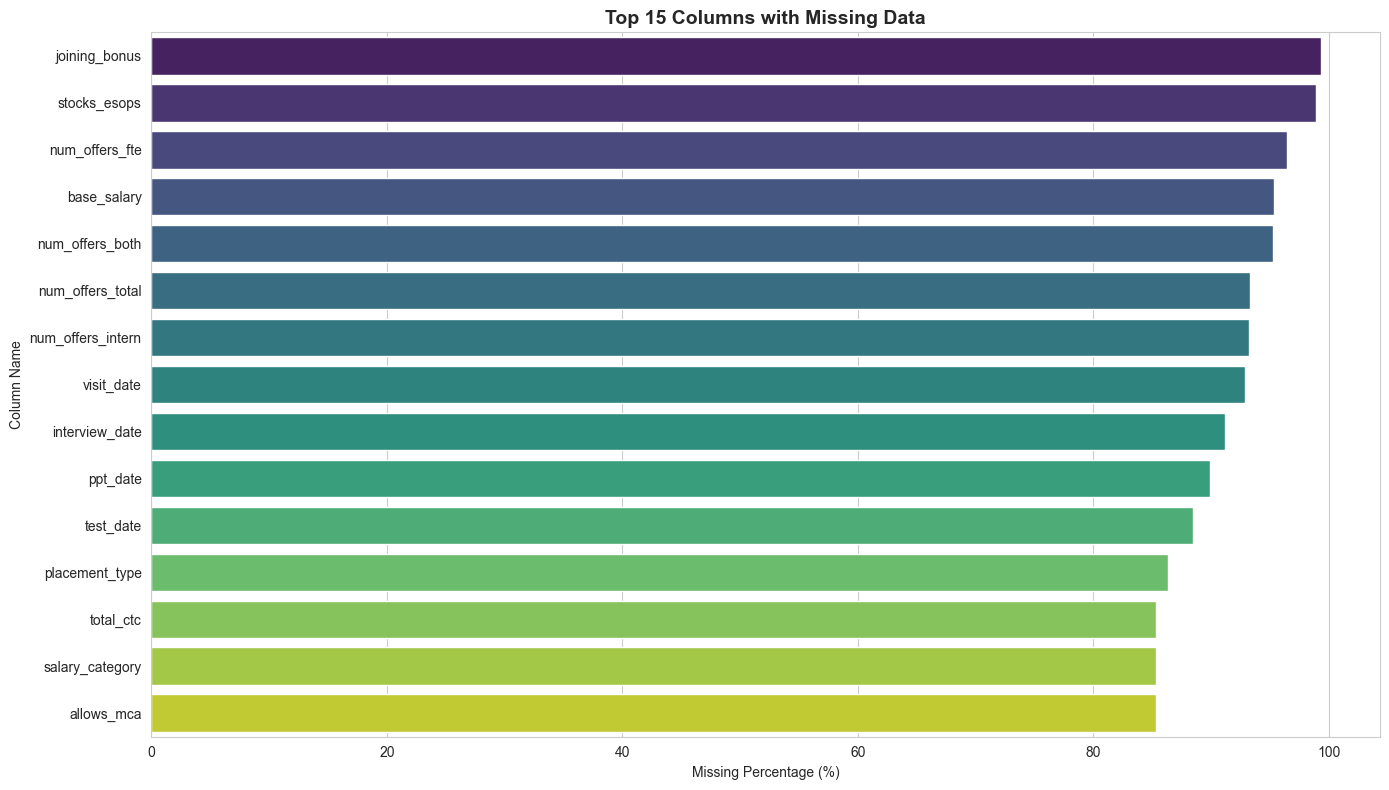

In [12]:
# Visualize missing data
plt.figure(figsize=(14, 8))
missing_cols = missing_data[missing_data['Missing_Percentage'] > 0].head(15)
sns.barplot(data=missing_cols, y='Column', x='Missing_Percentage', palette='viridis')
plt.title('Top 15 Columns with Missing Data', fontsize=14, fontweight='bold')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Column Name')
plt.tight_layout()
plt.savefig('analysis_outputs/missing_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Temporal Analysis: Year-wise Distribution

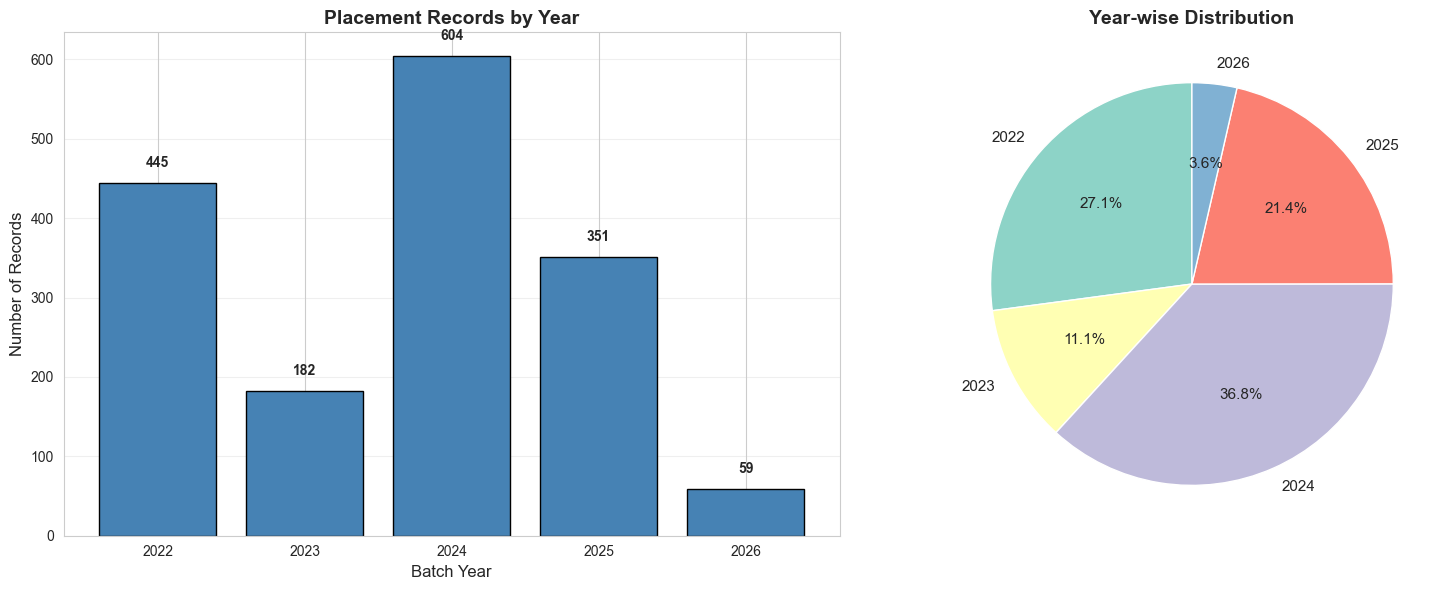


Year-wise Statistics:
  2022:  445 records ( 27.1%)
  2023:  182 records ( 11.1%)
  2024:  604 records ( 36.8%)
  2025:  351 records ( 21.4%)
  2026:   59 records (  3.6%)


In [13]:
# Records by year
year_dist = df['batch_year'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
axes[0].bar(year_dist.index, year_dist.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Batch Year', fontsize=12)
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].set_title('Placement Records by Year', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(year_dist.values):
    axes[0].text(year_dist.index[i], v + 20, str(v), ha='center', fontweight='bold')

# Pie chart
colors = plt.cm.Set3(range(len(year_dist)))
axes[1].pie(year_dist.values, labels=year_dist.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Year-wise Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_outputs/yearly_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nYear-wise Statistics:")
for year, count in year_dist.items():
    pct = count / len(df) * 100
    print(f"  {year}: {count:4d} records ({pct:5.1f}%)")

## 4. Placement Tier Analysis

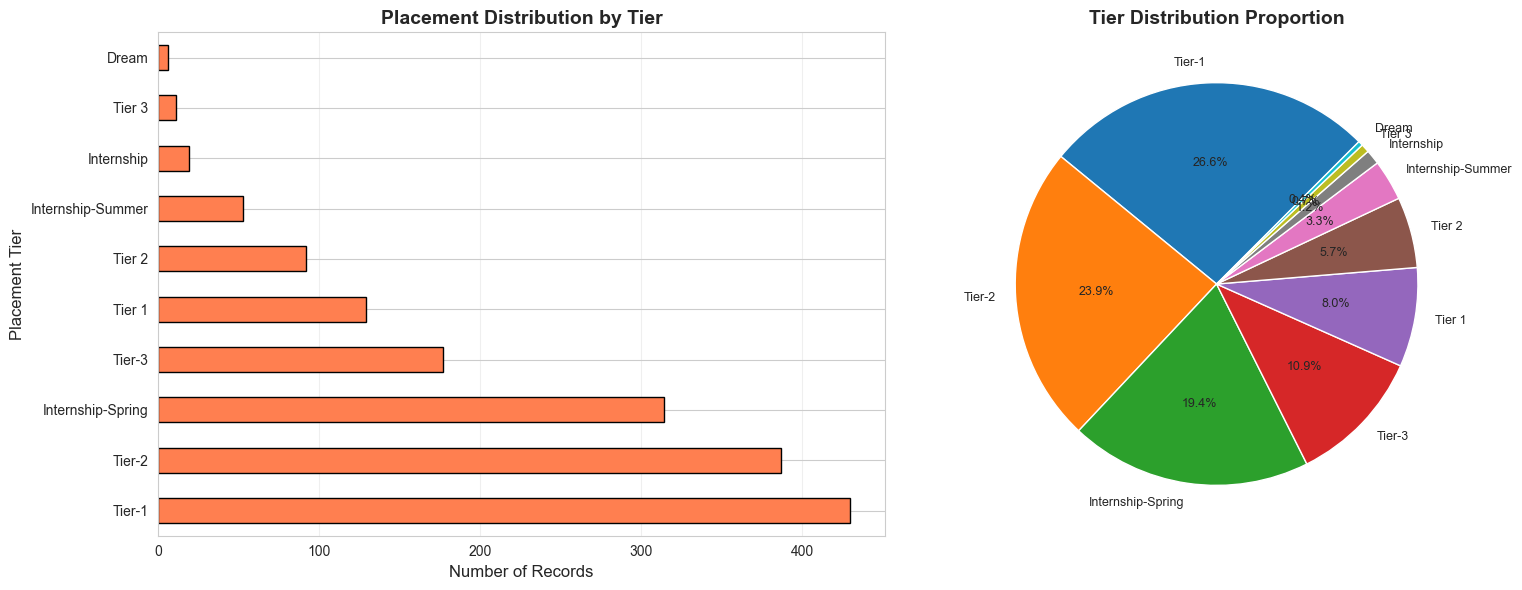


Tier-wise Statistics:
  Tier-1                   :  430 records ( 26.2%)
  Tier-2                   :  387 records ( 23.6%)
  Internship-Spring        :  314 records ( 19.1%)
  Tier-3                   :  177 records ( 10.8%)
  Tier 1                   :  129 records (  7.9%)
  Tier 2                   :   92 records (  5.6%)
  Internship-Summer        :   53 records (  3.2%)
  Internship               :   19 records (  1.2%)
  Tier 3                   :   11 records (  0.7%)
  Dream                    :    6 records (  0.4%)


In [14]:
# Tier distribution
tier_dist = df['placement_tier'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horizontal bar chart
tier_dist.plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_xlabel('Number of Records', fontsize=12)
axes[0].set_ylabel('Placement Tier', fontsize=12)
axes[0].set_title('Placement Distribution by Tier', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Pie chart
axes[1].pie(tier_dist.values, labels=tier_dist.index, autopct='%1.1f%%', 
            startangle=45, textprops={'fontsize': 9})
axes[1].set_title('Tier Distribution Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_outputs/tier_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTier-wise Statistics:")
for tier, count in tier_dist.items():
    pct = count / len(df) * 100
    print(f"  {tier:25s}: {count:4d} records ({pct:5.1f}%)")

## 5. Compensation Analysis

In [27]:
# Filter valid CTC records
df_ctc = df[df['total_ctc'].notna() & (df['total_ctc'] > 0)].copy()

print(f"Records with CTC data: {len(df_ctc):,} ({len(df_ctc)/len(df)*100:.1f}%)")
print("\nCTC Statistics (LPA):")
print("=" * 60)
print(f"Mean:        ₹{df_ctc['total_ctc'].mean():8.2f}")
print(f"Median:      ₹{df_ctc['total_ctc'].median():8.2f}")
print(f"Std Dev:     ₹{df_ctc['total_ctc'].std():8.2f}")
print(f"Min:         ₹{df_ctc['total_ctc'].min():8.2f}")
print(f"Max:         ₹{df_ctc['total_ctc'].max():8.2f}")
print(f"\n25th %ile:   ₹{df_ctc['total_ctc'].quantile(0.25):8.2f}")
print(f"50th %ile:   ₹{df_ctc['total_ctc'].quantile(0.50):8.2f}")
print(f"75th %ile:   ₹{df_ctc['total_ctc'].quantile(0.75):8.2f}")
print(f"90th %ile:   ₹{df_ctc['total_ctc'].quantile(0.90):8.2f}")
print(f"95th %ile:   ₹{df_ctc['total_ctc'].quantile(0.95):8.2f}")

Records with CTC data: 240 (14.6%)

CTC Statistics (LPA):
Mean:        ₹    3.72
Median:      ₹    0.29
Std Dev:     ₹    7.35
Min:         ₹    0.01
Max:         ₹   50.00

25th %ile:   ₹    0.12
50th %ile:   ₹    0.29
75th %ile:   ₹    3.70
90th %ile:   ₹   14.83
95th %ile:   ₹   19.00


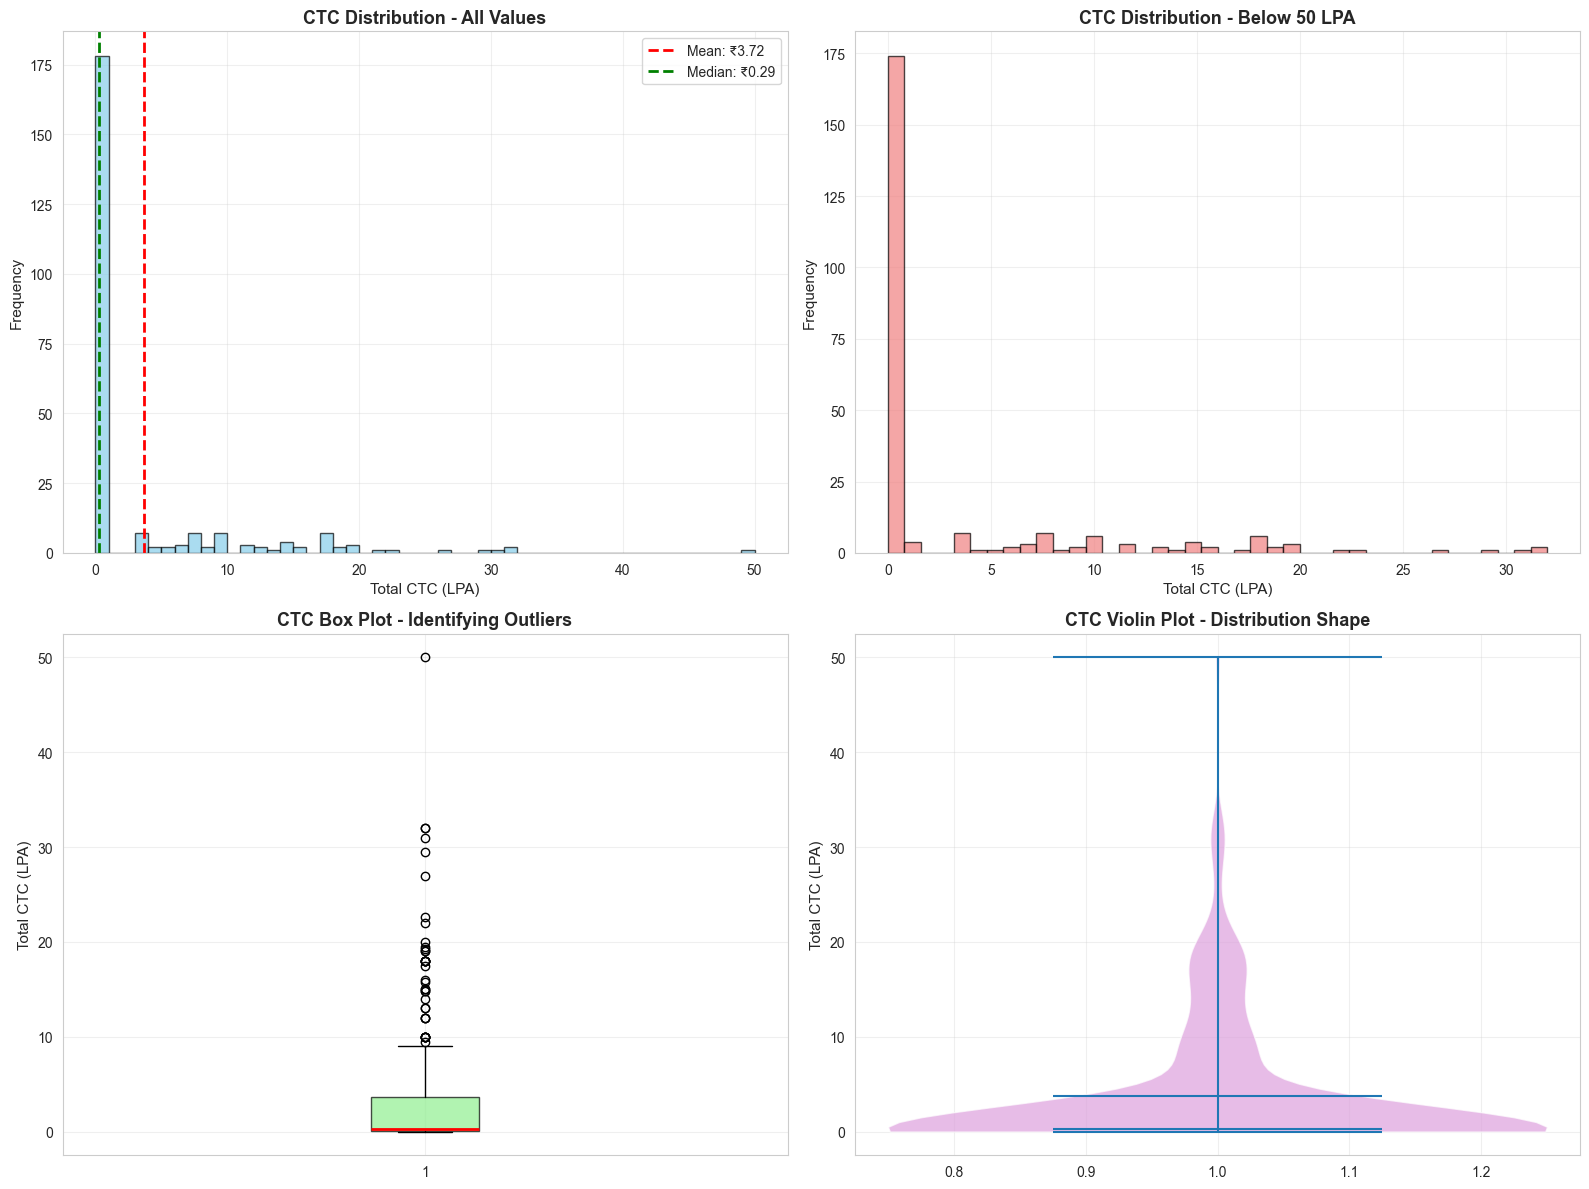

In [16]:
# CTC distribution visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram (full range)
axes[0, 0].hist(df_ctc['total_ctc'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Total CTC (LPA)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('CTC Distribution - All Values', fontsize=13, fontweight='bold')
axes[0, 0].axvline(df_ctc['total_ctc'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ₹{df_ctc["total_ctc"].mean():.2f}')
axes[0, 0].axvline(df_ctc['total_ctc'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ₹{df_ctc["total_ctc"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histogram (filtered < 50 LPA for better view)
df_ctc_filtered = df_ctc[df_ctc['total_ctc'] < 50]
axes[0, 1].hist(df_ctc_filtered['total_ctc'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Total CTC (LPA)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('CTC Distribution - Below 50 LPA', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Box plot
axes[1, 0].boxplot(df_ctc['total_ctc'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Total CTC (LPA)', fontsize=11)
axes[1, 0].set_title('CTC Box Plot - Identifying Outliers', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Violin plot
parts = axes[1, 1].violinplot([df_ctc['total_ctc'].values], vert=True, showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('plum')
    pc.set_alpha(0.7)
axes[1, 1].set_ylabel('Total CTC (LPA)', fontsize=11)
axes[1, 1].set_title('CTC Violin Plot - Distribution Shape', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_outputs/ctc_distribution_detailed.png', dpi=300, bbox_inches='tight')
plt.show()


Year-wise CTC Statistics:
            mean  median   std  count
batch_year                           
2024        3.72    0.29  7.35    240


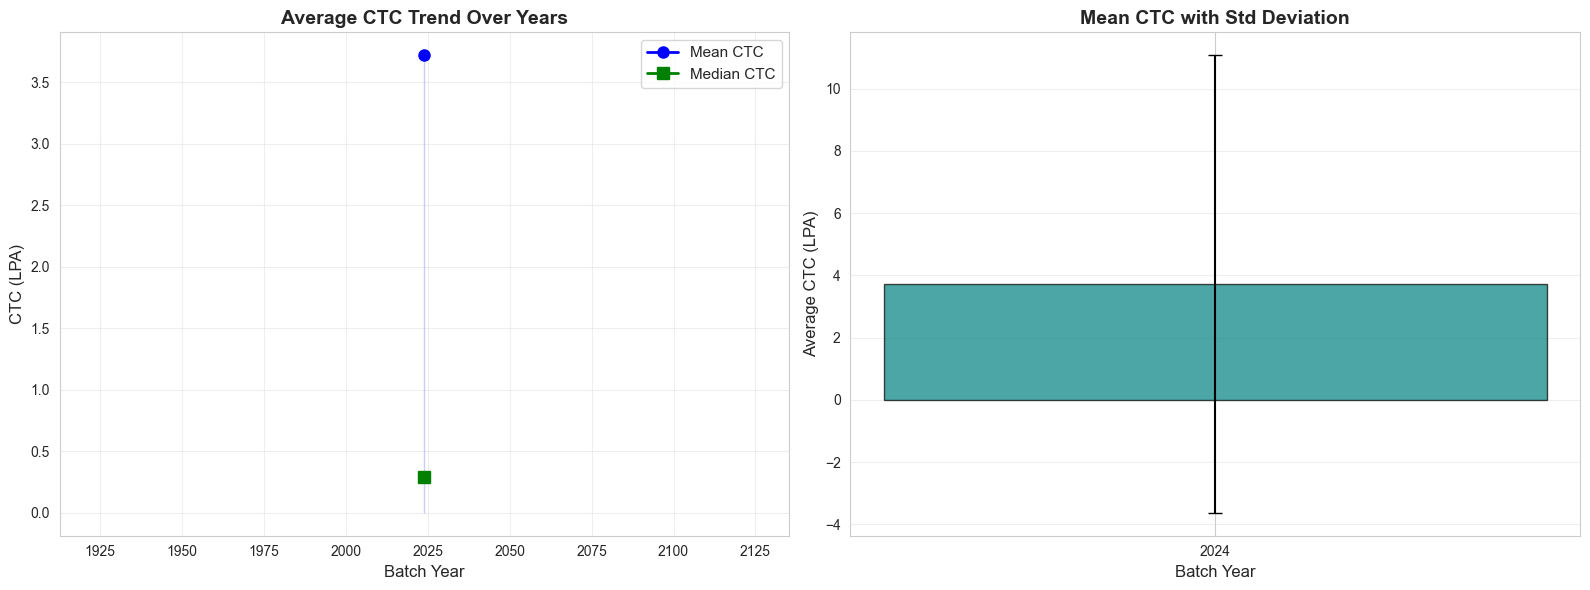

In [17]:
# Year-wise CTC trends
yearly_ctc = df_ctc.groupby('batch_year')['total_ctc'].agg(['mean', 'median', 'std', 'count']).round(2)

print("\nYear-wise CTC Statistics:")
print("=" * 80)
print(yearly_ctc)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line plot for mean and median
axes[0].plot(yearly_ctc.index, yearly_ctc['mean'], marker='o', linewidth=2, 
             markersize=8, label='Mean CTC', color='blue')
axes[0].plot(yearly_ctc.index, yearly_ctc['median'], marker='s', linewidth=2, 
             markersize=8, label='Median CTC', color='green')
axes[0].fill_between(yearly_ctc.index, yearly_ctc['mean'], alpha=0.2, color='blue')
axes[0].set_xlabel('Batch Year', fontsize=12)
axes[0].set_ylabel('CTC (LPA)', fontsize=12)
axes[0].set_title('Average CTC Trend Over Years', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Bar plot with error bars
x = range(len(yearly_ctc))
axes[1].bar(x, yearly_ctc['mean'], yerr=yearly_ctc['std'], 
            color='teal', alpha=0.7, capsize=5, edgecolor='black')
axes[1].set_xticks(x)
axes[1].set_xticklabels(yearly_ctc.index)
axes[1].set_xlabel('Batch Year', fontsize=12)
axes[1].set_ylabel('Average CTC (LPA)', fontsize=12)
axes[1].set_title('Mean CTC with Std Deviation', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_outputs/yearly_ctc_trends.png', dpi=300, bbox_inches='tight')
plt.show()


Tier-wise CTC Statistics:
                    mean  median  count
placement_tier                         
Tier 1          3.679467     0.3    126
Tier 3          2.861455     4.0     11
Tier 2          1.991947     0.2     91


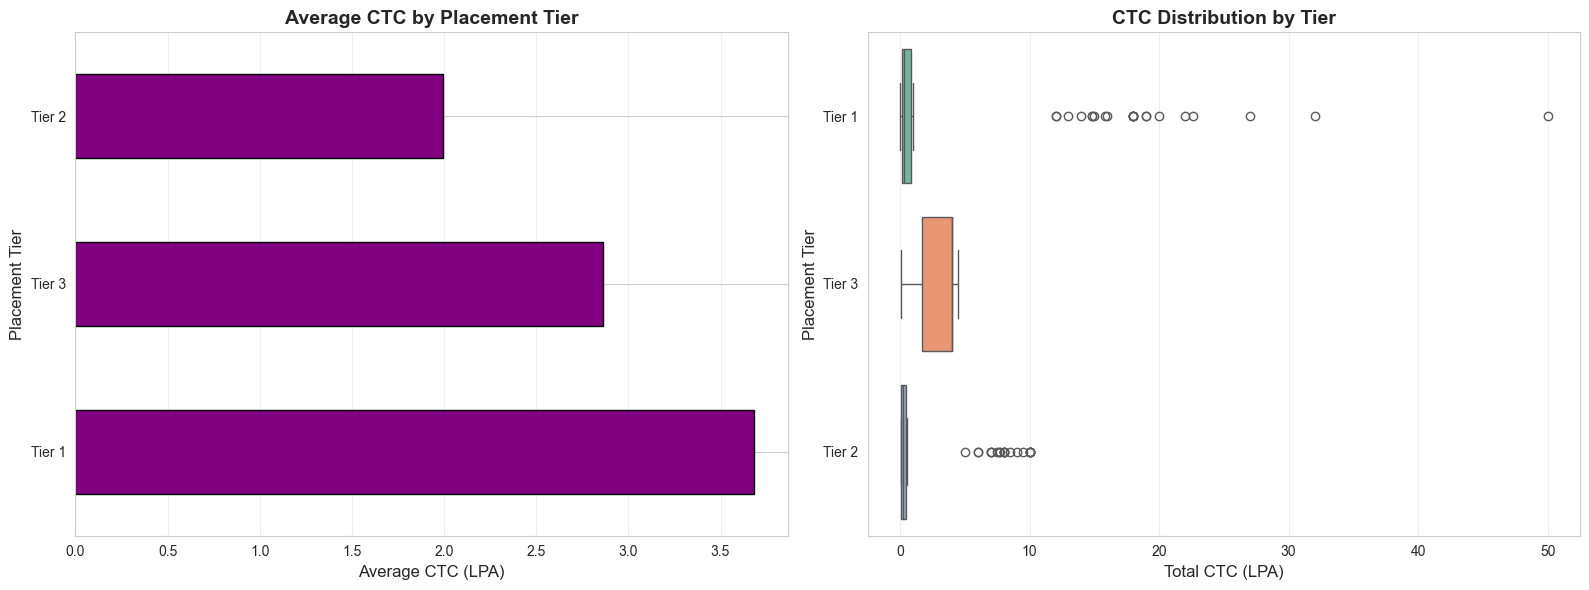

In [18]:
# Tier-wise CTC analysis
tier_ctc = df_ctc.groupby('placement_tier')['total_ctc'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

print("\nTier-wise CTC Statistics:")
print("=" * 80)
print(tier_ctc)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
tier_ctc['mean'].plot(kind='barh', ax=axes[0], color='purple', edgecolor='black')
axes[0].set_xlabel('Average CTC (LPA)', fontsize=12)
axes[0].set_ylabel('Placement Tier', fontsize=12)
axes[0].set_title('Average CTC by Placement Tier', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Box plot
tier_order = tier_ctc.index.tolist()
df_ctc_tier = df_ctc[df_ctc['placement_tier'].isin(tier_order)]
sns.boxplot(data=df_ctc_tier, y='placement_tier', x='total_ctc', 
            order=tier_order, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Total CTC (LPA)', fontsize=12)
axes[1].set_ylabel('Placement Tier', fontsize=12)
axes[1].set_title('CTC Distribution by Tier', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_outputs/tier_wise_ctc.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Company Analysis

Top 20 Recruiters by Number of Offers:
 1. Ibm (General)                           :    50 offers
 2. Ltimindtree                             :    41 offers
 3. Deloitte India                          :    31 offers
 4. Ibm (Female Only)                       :    28 offers
 5. Zebra Technologies                      :    25 offers
 6. Apple (India)                           :    20 offers
 7. Kpmg (T3)                               :    20 offers
 8. Phdata                                  :    20 offers
 9. Ey India                                :    18 offers
10. Juniper Network                         :    16 offers
11. Kpmg Global Services                    :    16 offers
12. Cars24                                  :    15 offers
13. Consillio (T2)                          :    15 offers
14. Infoblox                                :    15 offers
15. Couchbase                               :    12 offers
16. Netradyne                               :    12 offers
17. Societe Gener

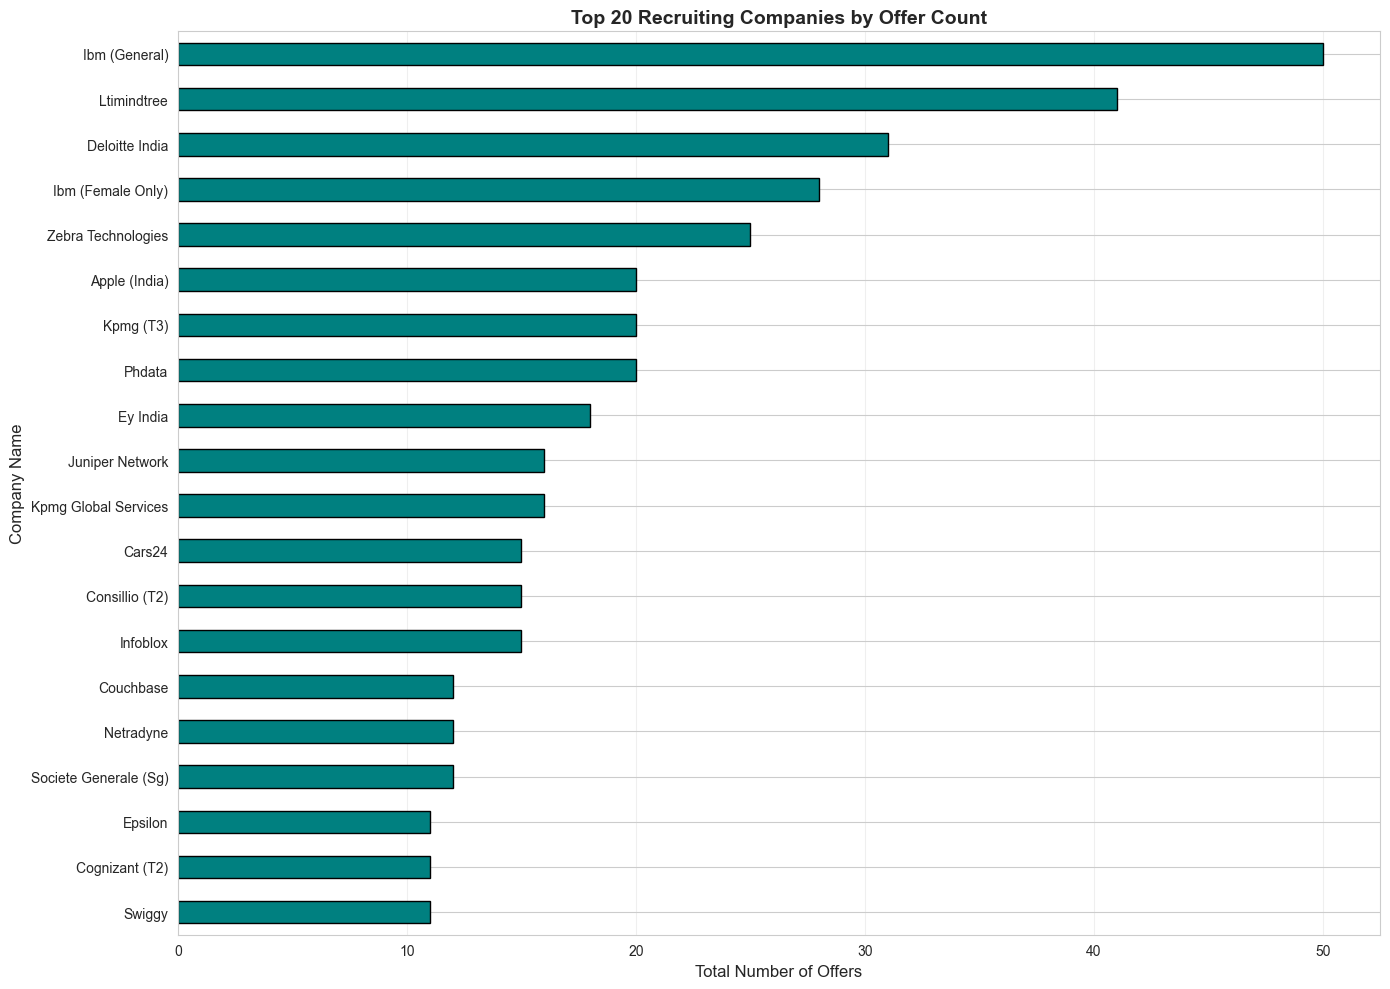

In [19]:
# Top companies by offer count
df_offers = df[df['num_offers_total'].notna() & (df['num_offers_total'] > 0)]
top_recruiters = df_offers.groupby('company_name')['num_offers_total'].sum().nlargest(20).sort_values()

print("Top 20 Recruiters by Number of Offers:")
print("=" * 80)
for idx, (company, offers) in enumerate(top_recruiters.sort_values(ascending=False).items(), 1):
    print(f"{idx:2d}. {company:40s}: {offers:5.0f} offers")

plt.figure(figsize=(14, 10))
top_recruiters.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Total Number of Offers', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.title('Top 20 Recruiting Companies by Offer Count', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/top_recruiters.png', dpi=300, bbox_inches='tight')
plt.show()


Top 20 Highest Paying Companies (min 2 placements):
208. Thorogood Associates                    : ₹  14.81 LPA (n=2)
148. Media.Net                               : ₹  11.50 LPA (n=2)
135. Kpmg Global Services                    : ₹   2.60 LPA (n=2)
156. Mutiplier                               : ₹   0.80 LPA (n=2)
162. Nvidia                                  : ₹   0.55 LPA (n=2)
100. Guidewire (Intern)                      : ₹   0.50 LPA (n=2)
77. E-Litmus                                : ₹   0.12 LPA (n=2)


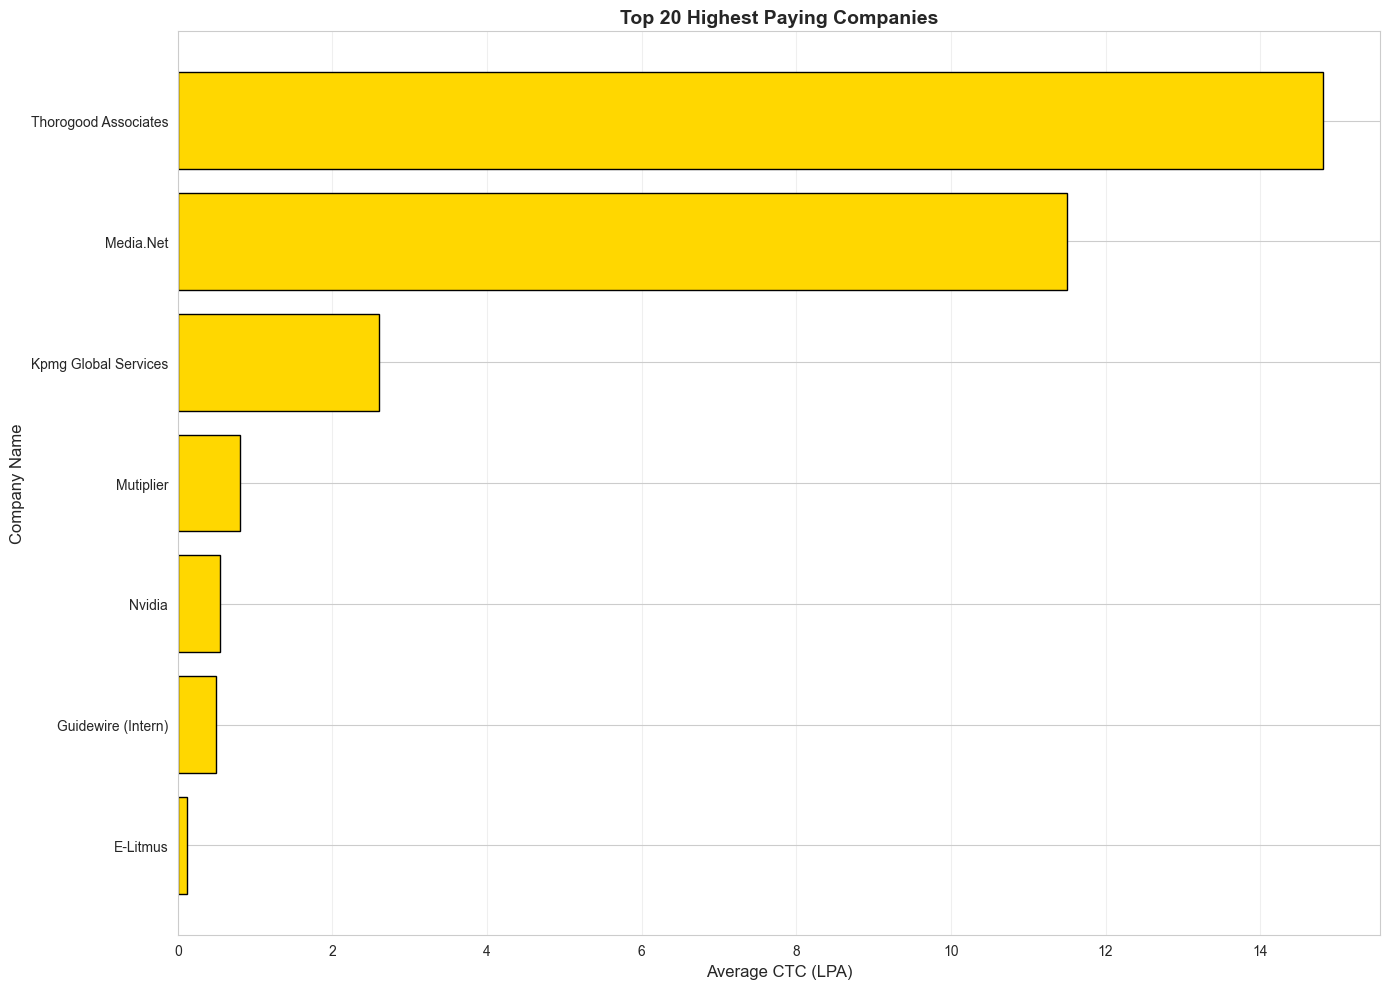

In [20]:
# Top companies by average CTC (minimum 2 placements for reliability)
company_ctc = df_ctc.groupby('company_name').agg({
    'total_ctc': ['mean', 'median', 'count']
}).reset_index()
company_ctc.columns = ['company_name', 'avg_ctc', 'median_ctc', 'count']
company_ctc = company_ctc[company_ctc['count'] >= 2]  # At least 2 placements
top_paying = company_ctc.nlargest(20, 'avg_ctc').sort_values('avg_ctc')

print("\nTop 20 Highest Paying Companies (min 2 placements):")
print("=" * 80)
for idx, row in top_paying.sort_values('avg_ctc', ascending=False).iterrows():
    print(f"{row.name+1:2d}. {row['company_name']:40s}: ₹{row['avg_ctc']:7.2f} LPA (n={int(row['count'])})")

plt.figure(figsize=(14, 10))
plt.barh(range(len(top_paying)), top_paying['avg_ctc'], color='gold', edgecolor='black')
plt.yticks(range(len(top_paying)), top_paying['company_name'])
plt.xlabel('Average CTC (LPA)', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.title('Top 20 Highest Paying Companies', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/top_paying_companies.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Role Type Analysis

Role Type Distribution:
SDE-Core                      :  744 ( 45.3%)
Other                         :  387 ( 23.6%)
Intern/Trainee                :  207 ( 12.6%)
SDE-ML/AI                     :  103 (  6.3%)
Business Analyst              :   85 (  5.2%)
SDE-Test                      :   43 (  2.6%)
SDE-Data                      :   22 (  1.3%)
Hardware/Embedded             :   20 (  1.2%)
Data Scientist                :   15 (  0.9%)
Data Analyst                  :   10 (  0.6%)
SDE-DevOps/SRE                :    5 (  0.3%)


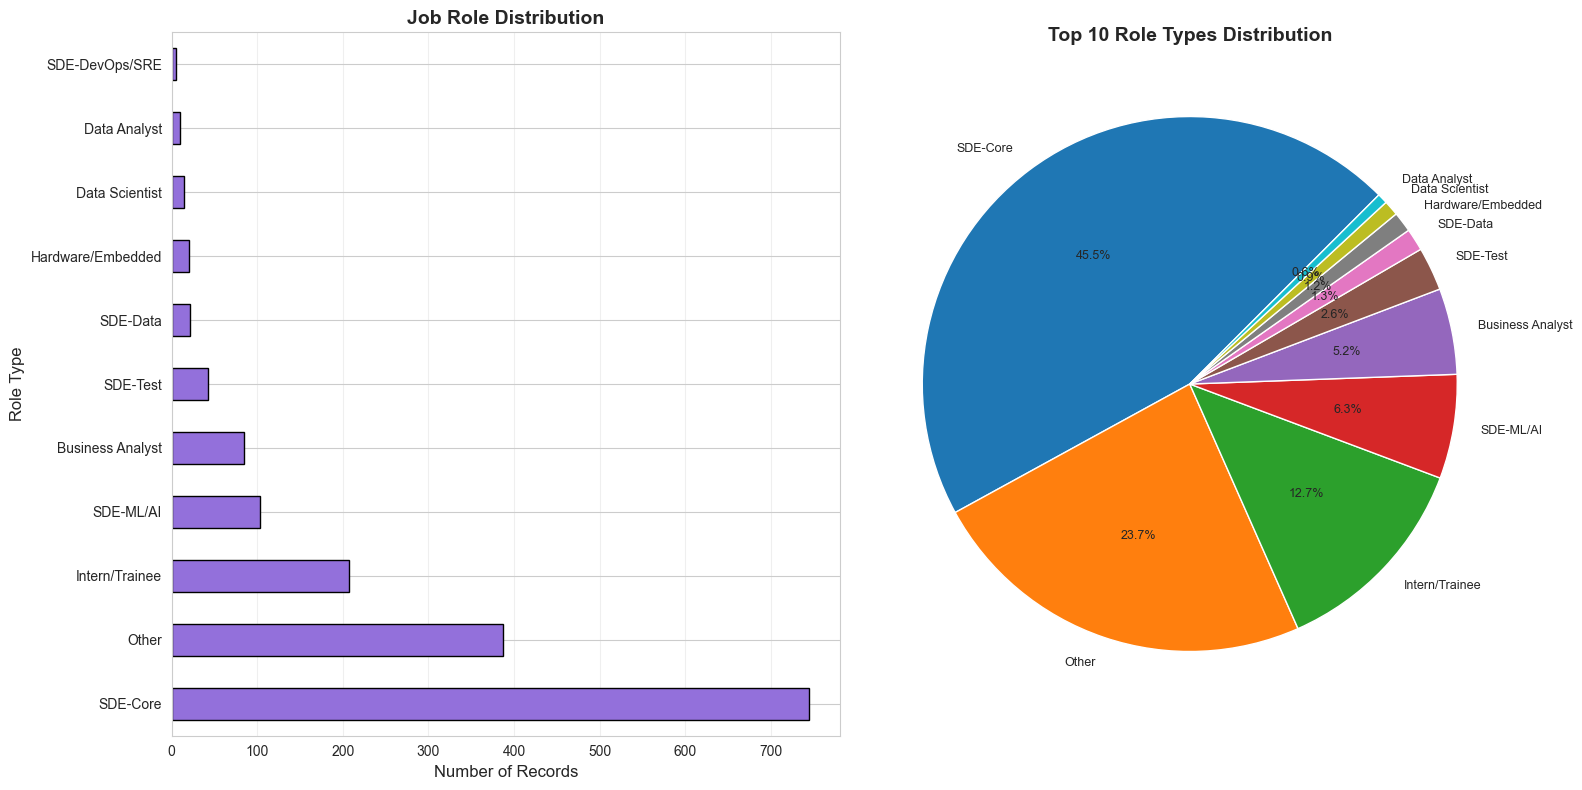

In [21]:
# Role distribution
role_dist = df['role_type'].value_counts()

print("Role Type Distribution:")
print("=" * 80)
for role, count in role_dist.items():
    pct = count / len(df) * 100
    print(f"{role:30s}: {count:4d} ({pct:5.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Horizontal bar chart
role_dist.plot(kind='barh', ax=axes[0], color='mediumpurple', edgecolor='black')
axes[0].set_xlabel('Number of Records', fontsize=12)
axes[0].set_ylabel('Role Type', fontsize=12)
axes[0].set_title('Job Role Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Pie chart (top 10)
top_roles = role_dist.head(10)
axes[1].pie(top_roles.values, labels=top_roles.index, autopct='%1.1f%%',
            startangle=45, textprops={'fontsize': 9})
axes[1].set_title('Top 10 Role Types Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_outputs/role_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Role-wise CTC Statistics:
                       mean  median  count
role_type                                 
SDE-Test           7.277778   0.250      9
Other              5.670601   0.300     69
SDE-Core           3.516248   0.250    101
SDE-ML/AI          2.908235   0.800     17
Business Analyst   2.037045   0.250     11
SDE-DevOps/SRE     0.420000   0.420      1
Intern/Trainee     0.325286   0.300     21
SDE-Data           0.303333   0.150      3
Data Scientist     0.260000   0.250      3
Hardware/Embedded  0.247000   0.225      5


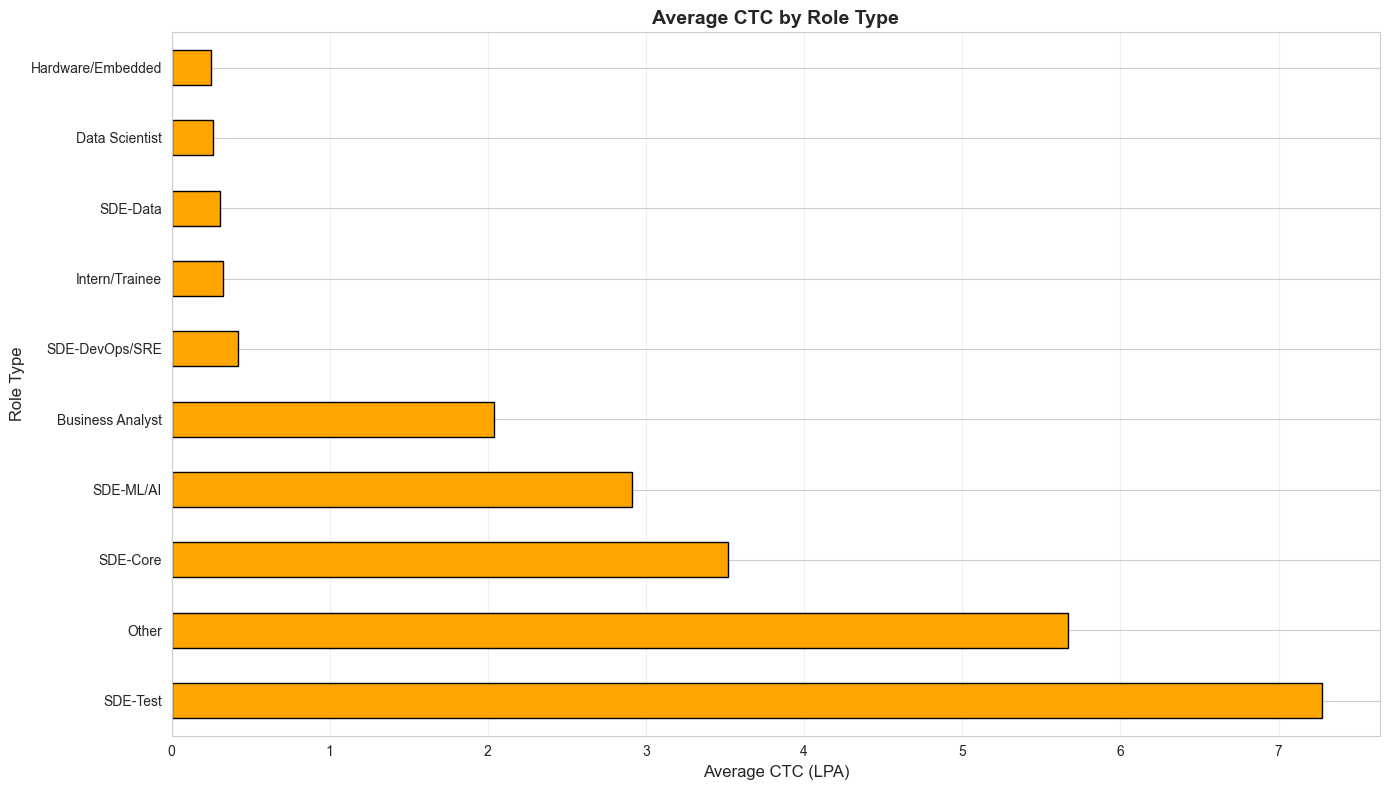

In [22]:
# Role-wise CTC analysis
role_ctc = df_ctc.groupby('role_type')['total_ctc'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

print("\nRole-wise CTC Statistics:")
print("=" * 80)
print(role_ctc)

plt.figure(figsize=(14, 8))
role_ctc['mean'].plot(kind='barh', color='orange', edgecolor='black')
plt.xlabel('Average CTC (LPA)', fontsize=12)
plt.ylabel('Role Type', fontsize=12)
plt.title('Average CTC by Role Type', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_outputs/role_wise_ctc.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. CGPA Cutoff Analysis

Records with CGPA cutoff: 639 (38.9%)

CGPA Cutoff Statistics:
Mean:    7.28
Median:  7.00
Std Dev: 0.86
Min:     1.00
Max:     9.50


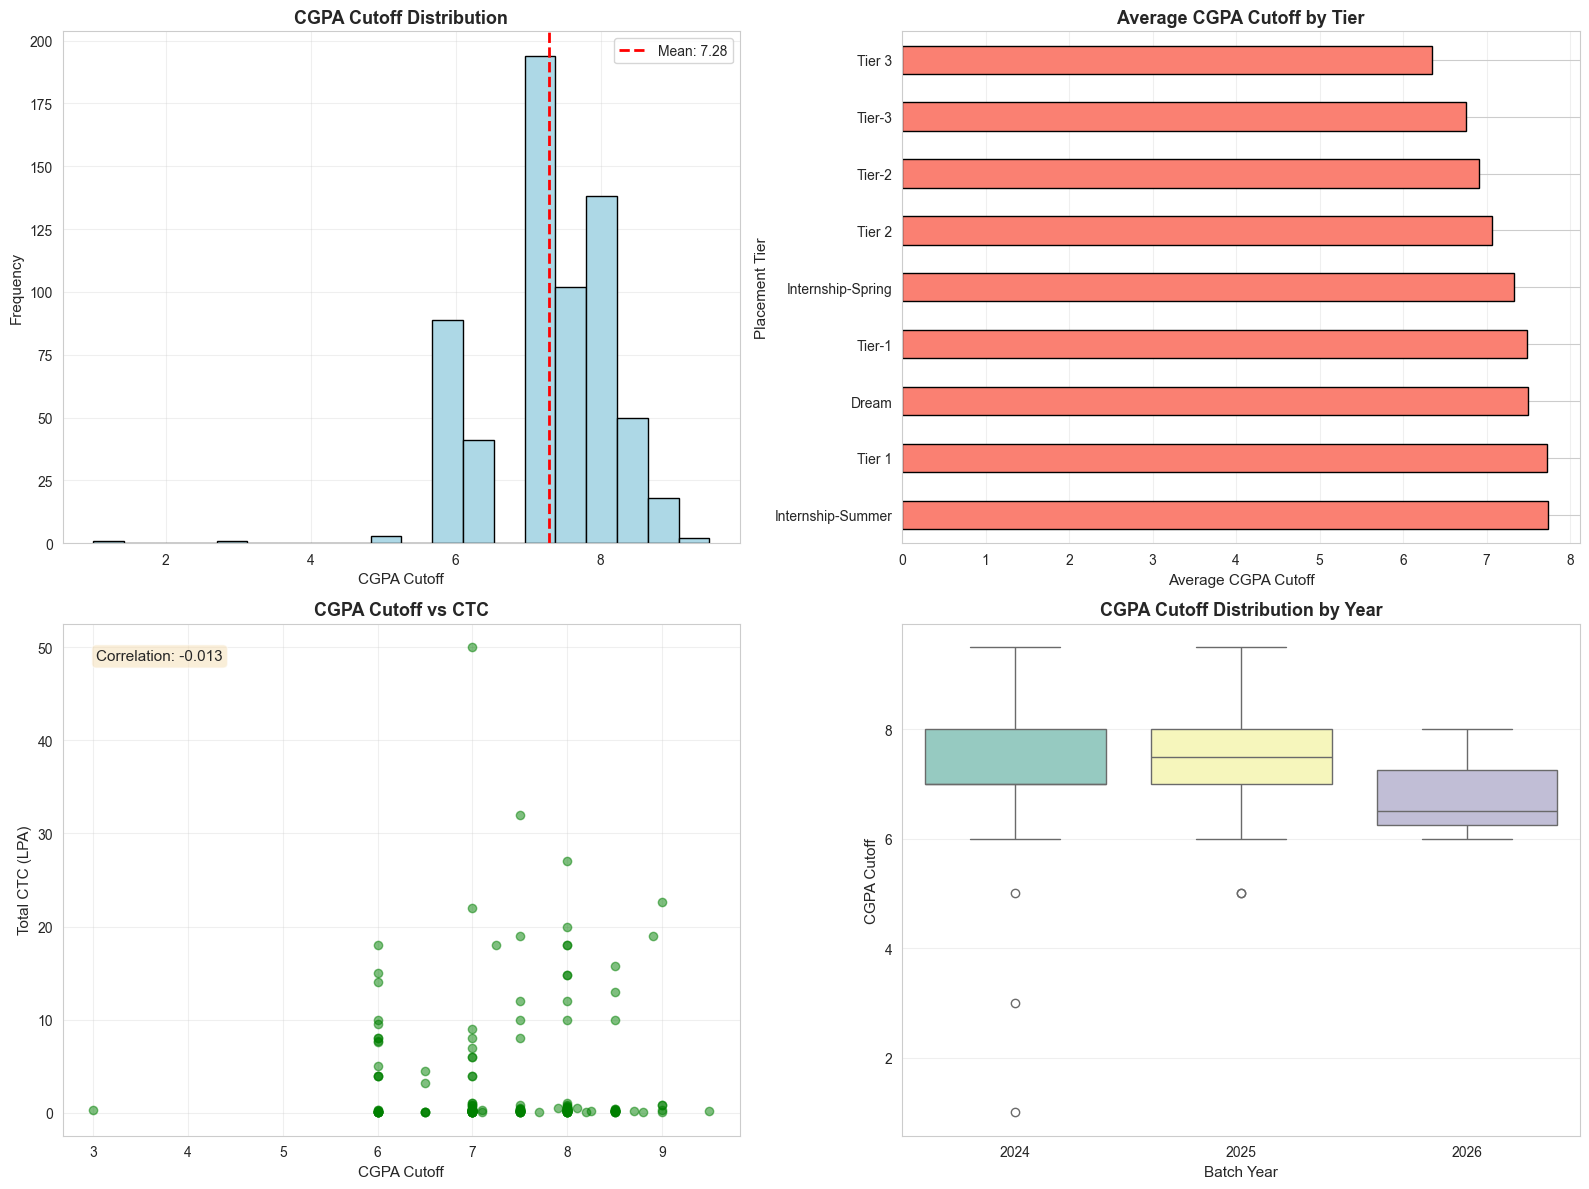

In [23]:
# CGPA analysis
df_cgpa = df[df['cgpa_cutoff'].notna()]

print(f"Records with CGPA cutoff: {len(df_cgpa):,} ({len(df_cgpa)/len(df)*100:.1f}%)")
print("\nCGPA Cutoff Statistics:")
print("=" * 60)
print(f"Mean:    {df_cgpa['cgpa_cutoff'].mean():.2f}")
print(f"Median:  {df_cgpa['cgpa_cutoff'].median():.2f}")
print(f"Std Dev: {df_cgpa['cgpa_cutoff'].std():.2f}")
print(f"Min:     {df_cgpa['cgpa_cutoff'].min():.2f}")
print(f"Max:     {df_cgpa['cgpa_cutoff'].max():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_cgpa['cgpa_cutoff'], bins=20, color='lightblue', edgecolor='black')
axes[0, 0].set_xlabel('CGPA Cutoff', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('CGPA Cutoff Distribution', fontsize=13, fontweight='bold')
axes[0, 0].axvline(df_cgpa['cgpa_cutoff'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_cgpa["cgpa_cutoff"].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# CGPA by tier
tier_cgpa = df_cgpa.groupby('placement_tier')['cgpa_cutoff'].mean().sort_values(ascending=False)
tier_cgpa.plot(kind='barh', ax=axes[0, 1], color='salmon', edgecolor='black')
axes[0, 1].set_xlabel('Average CGPA Cutoff', fontsize=11)
axes[0, 1].set_ylabel('Placement Tier', fontsize=11)
axes[0, 1].set_title('Average CGPA Cutoff by Tier', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# CGPA vs CTC scatter (for records with both)
df_both = df[(df['cgpa_cutoff'].notna()) & (df['total_ctc'].notna()) & (df['total_ctc'] > 0)]
if len(df_both) > 0:
    axes[1, 0].scatter(df_both['cgpa_cutoff'], df_both['total_ctc'], alpha=0.5, color='green')
    axes[1, 0].set_xlabel('CGPA Cutoff', fontsize=11)
    axes[1, 0].set_ylabel('Total CTC (LPA)', fontsize=11)
    axes[1, 0].set_title('CGPA Cutoff vs CTC', fontsize=13, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # Calculate and display correlation
    corr = df_both['cgpa_cutoff'].corr(df_both['total_ctc'])
    axes[1, 0].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=axes[1, 0].transAxes, fontsize=11, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Box plot by year
df_cgpa_valid = df_cgpa[df_cgpa['batch_year'].isin([2022, 2023, 2024, 2025, 2026])]
sns.boxplot(data=df_cgpa_valid, x='batch_year', y='cgpa_cutoff', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_xlabel('Batch Year', fontsize=11)
axes[1, 1].set_ylabel('CGPA Cutoff', fontsize=11)
axes[1, 1].set_title('CGPA Cutoff Distribution by Year', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_outputs/cgpa_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Additional Benefits Analysis

Companies Offering Additional Benefits:
Internship Program  :  285 ( 17.4%)
Stocks/ESOPs        :   17 (  1.0%)
Joining Bonus       :   10 (  0.6%)


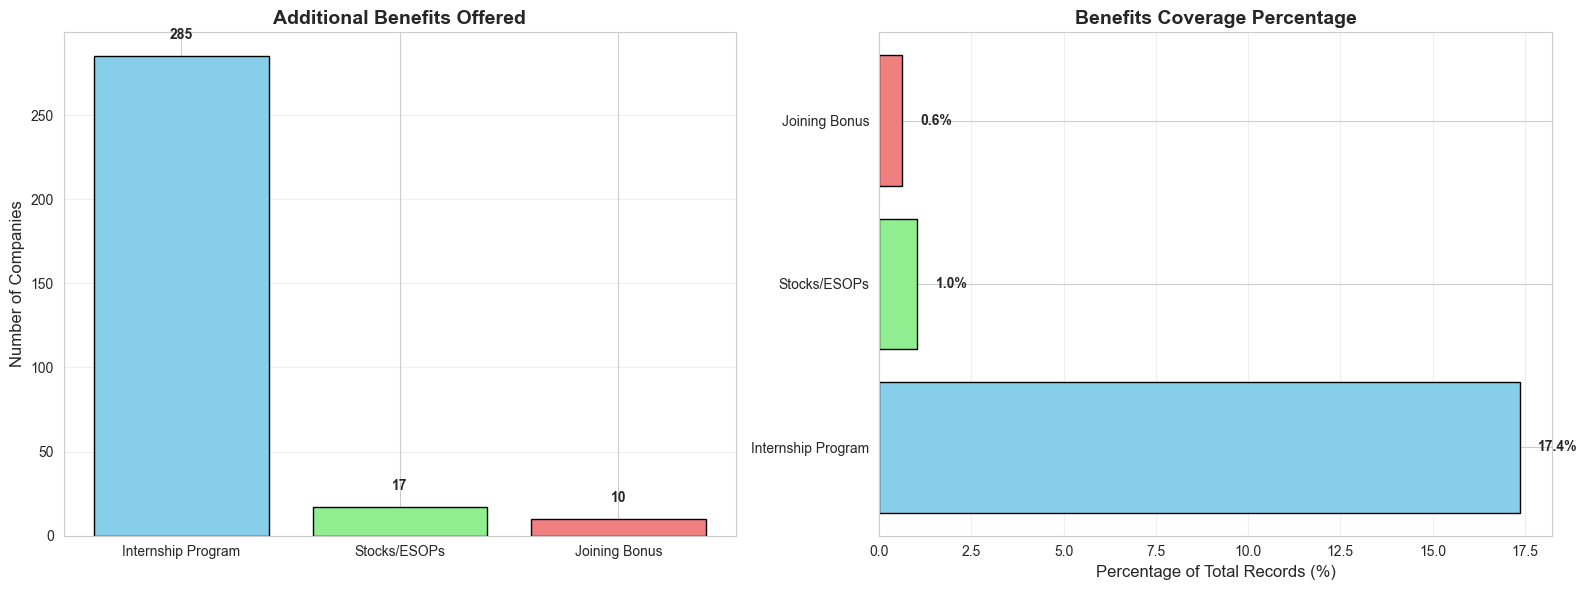

In [24]:
# Benefits analysis
benefits = {
    'Internship Program': df['has_internship'].sum(),
    'Stocks/ESOPs': df['has_stocks'].sum(),
    'Joining Bonus': df['has_joining_bonus'].sum()
}

print("Companies Offering Additional Benefits:")
print("=" * 60)
for benefit, count in benefits.items():
    pct = count / len(df) * 100
    print(f"{benefit:20s}: {count:4d} ({pct:5.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
axes[0].bar(benefits.keys(), benefits.values(), color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')
axes[0].set_ylabel('Number of Companies', fontsize=12)
axes[0].set_title('Additional Benefits Offered', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(benefits.values()):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Percentage chart
pcts = [v/len(df)*100 for v in benefits.values()]
axes[1].barh(list(benefits.keys()), pcts, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')
axes[1].set_xlabel('Percentage of Total Records (%)', fontsize=12)
axes[1].set_title('Benefits Coverage Percentage', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(pcts):
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_outputs/additional_benefits.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Key Insights Summary

In [25]:
# Generate comprehensive insights
insights = {
    'total_records': len(df),
    'years_covered': f"{df['batch_year'].min()}-{df['batch_year'].max()}",
    'unique_companies': df['company_name'].nunique(),
    'unique_colleges': df['college'].nunique(),
    'avg_ctc': df_ctc['total_ctc'].mean() if len(df_ctc) > 0 else 0,
    'median_ctc': df_ctc['total_ctc'].median() if len(df_ctc) > 0 else 0,
    'max_ctc': df_ctc['total_ctc'].max() if len(df_ctc) > 0 else 0,
    'top_recruiter': top_recruiters.index[-1] if len(top_recruiters) > 0 else 'N/A',
    'top_recruiter_offers': top_recruiters.iloc[-1] if len(top_recruiters) > 0 else 0,
    'highest_paying': top_paying.iloc[-1]['company_name'] if len(top_paying) > 0 else 'N/A',
    'highest_avg_ctc': top_paying.iloc[-1]['avg_ctc'] if len(top_paying) > 0 else 0,
    'most_common_role': role_dist.index[0],
    'avg_cgpa': df_cgpa['cgpa_cutoff'].mean() if len(df_cgpa) > 0 else 0,
    'data_quality_ctc': len(df_ctc)/len(df)*100,
    'data_quality_cgpa': len(df_cgpa)/len(df)*100
}

print("="*80)
print(" "*25 + "KEY INSIGHTS SUMMARY")
print("="*80)
print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Records: {insights['total_records']:,}")
print(f"   • Coverage Period: {insights['years_covered']}")
print(f"   • Unique Companies: {insights['unique_companies']:,}")
print(f"   • Unique Colleges: {insights['unique_colleges']}")

print(f"\n💰 COMPENSATION INSIGHTS:")
print(f"   • Average CTC: ₹{insights['avg_ctc']:.2f} LPA")
print(f"   • Median CTC: ₹{insights['median_ctc']:.2f} LPA")
print(f"   • Highest Package: ₹{insights['max_ctc']:.2f} LPA")

print(f"\n🏆 TOP PERFORMERS:")
print(f"   • Top Recruiter: {insights['top_recruiter']} ({insights['top_recruiter_offers']:.0f} offers)")
print(f"   • Highest Paying: {insights['highest_paying']} (₹{insights['highest_avg_ctc']:.2f} LPA avg)")

print(f"\n📈 PLACEMENT TRENDS:")
print(f"   • Most Common Role: {insights['most_common_role']}")
print(f"   • Average CGPA Cutoff: {insights['avg_cgpa']:.2f}")

print(f"\n✅ DATA QUALITY:")
print(f"   • CTC Data Completeness: {insights['data_quality_ctc']:.1f}%")
print(f"   • CGPA Data Completeness: {insights['data_quality_cgpa']:.1f}%")
print("="*80)

# Save insights to JSON
with open('analysis_outputs/eda_insights.json', 'w') as f:
    json.dump(insights, f, indent=4)
print("\n✓ Insights saved to: analysis_outputs/eda_insights.json")

                         KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW:
   • Total Records: 1,641
   • Coverage Period: 2022-2026
   • Unique Companies: 1,073
   • Unique Colleges: 1

💰 COMPENSATION INSIGHTS:
   • Average CTC: ₹3.72 LPA
   • Median CTC: ₹0.29 LPA
   • Highest Package: ₹50.00 LPA

🏆 TOP PERFORMERS:
   • Top Recruiter: Ibm (General) (50 offers)
   • Highest Paying: Thorogood Associates (₹14.81 LPA avg)

📈 PLACEMENT TRENDS:
   • Most Common Role: SDE-Core
   • Average CGPA Cutoff: 7.28

✅ DATA QUALITY:
   • CTC Data Completeness: 14.6%
   • CGPA Data Completeness: 38.9%

✓ Insights saved to: analysis_outputs/eda_insights.json


## 11. Correlation Analysis

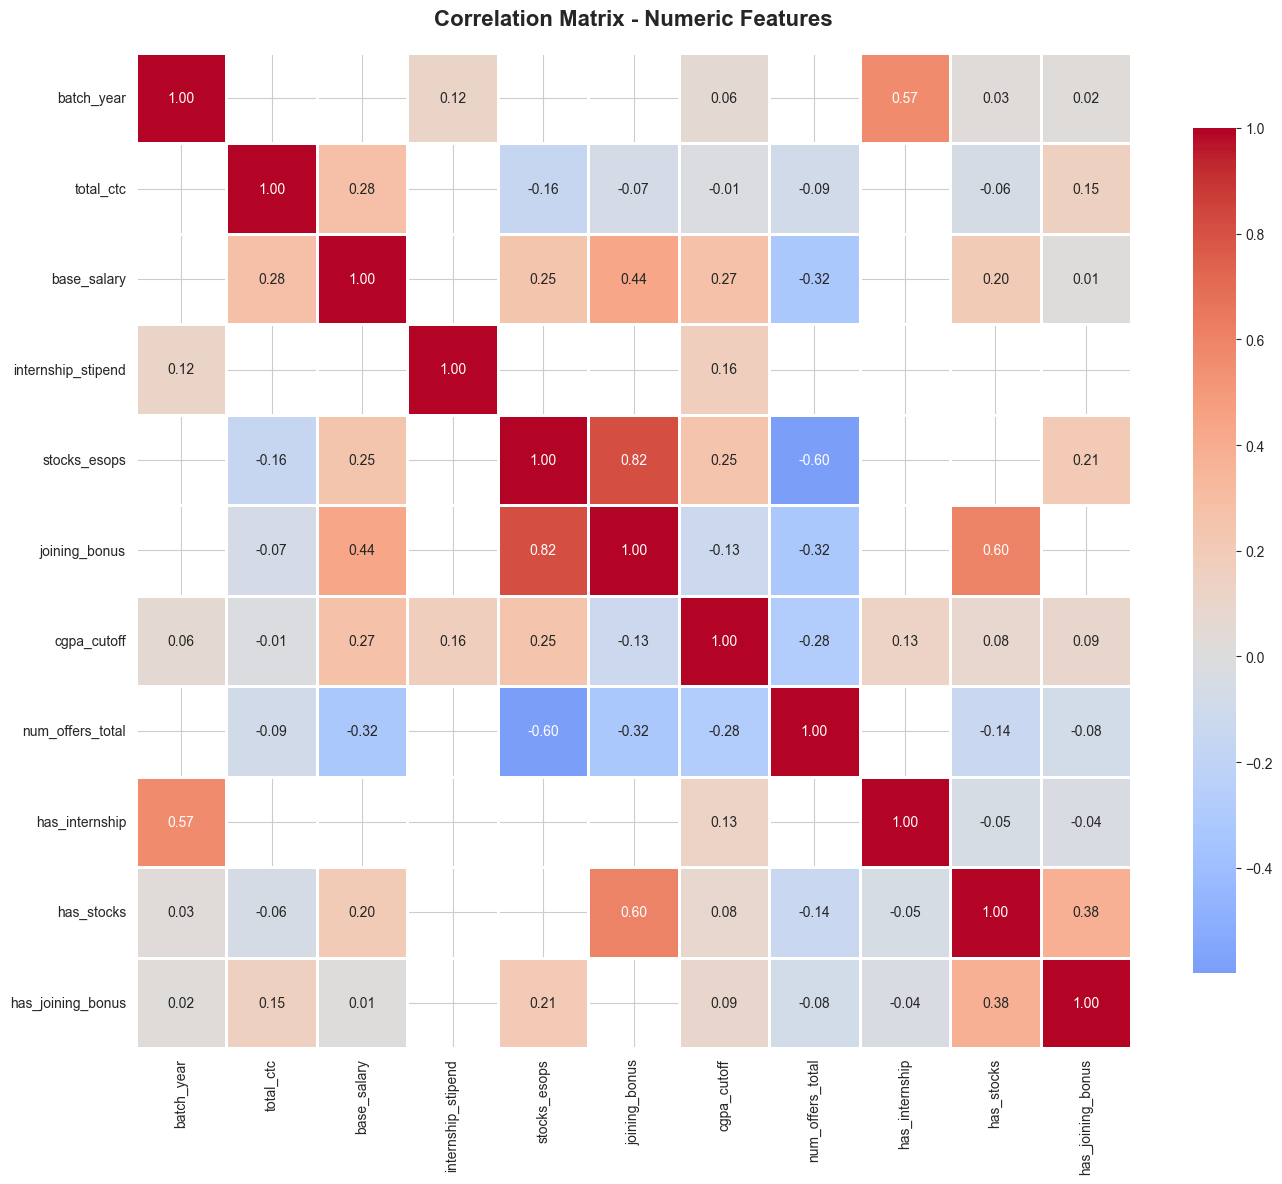


Top Positive Correlations (excluding self-correlation):
joining_bonus      stocks_esops         0.818054
stocks_esops       joining_bonus        0.818054
has_stocks         joining_bonus        0.604708
joining_bonus      has_stocks           0.604708
batch_year         has_internship       0.565580
has_internship     batch_year           0.565580
base_salary        joining_bonus        0.437707
joining_bonus      base_salary          0.437707
has_joining_bonus  has_stocks           0.378653
has_stocks         has_joining_bonus    0.378653
dtype: float64


In [26]:
# Select numeric columns for correlation
numeric_cols = ['batch_year', 'total_ctc', 'base_salary', 'internship_stipend', 
                'stocks_esops', 'joining_bonus', 'cgpa_cutoff', 'num_offers_total',
                'has_internship', 'has_stocks', 'has_joining_bonus']

# Filter columns that exist
available_cols = [col for col in numeric_cols if col in df.columns]
df_corr = df[available_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('analysis_outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop Positive Correlations (excluding self-correlation):")
print("="*60)
corr_pairs = df_corr.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.sort_values(ascending=False).head(10))

## Conclusion

This comprehensive EDA has provided valuable insights into:
- **Temporal patterns** in placement data across 2022-2026
- **Compensation trends** and distribution across tiers and roles
- **Top recruiting companies** and their offering patterns
- **Role-wise analysis** showing demand and compensation
- **CGPA requirements** and their relationship with compensation
- **Additional benefits** provided by companies

**Next Steps:**
1. Proceed to Temporal Trend Analysis (Notebook 02)
2. Conduct Cross-College Comparative Analysis (Notebook 03)
3. Perform Statistical Testing (Notebook 04)
4. Build Predictive Models (Notebook 05)